In [69]:
model_name = ["Deepseek-v2-lite", "Deepseek-moe-16b", "Qwen1.5-moe", "Qwen3-30B"]
# in 4 gpu 4090
# seconds
sllm_init_meta_time = [ 3.41, 2.51, 1.98, 3.23 ]
# load param 4g
sllm_load_param_time = [ 2.05, 1.59, 1.36, 4.82 ]
# sllm_pipe_time
sllm_pipe_time = [ 5.23, 3.95, 3.14, 7.30 ]
# prefill time
sllm_first_prefill_time = [ 1.03 , 0.98 , 0.96, 1.55]
# decode time
sllm_avg_decode_time = [ 0.28, 0.37, 0.35, 0.59 ]

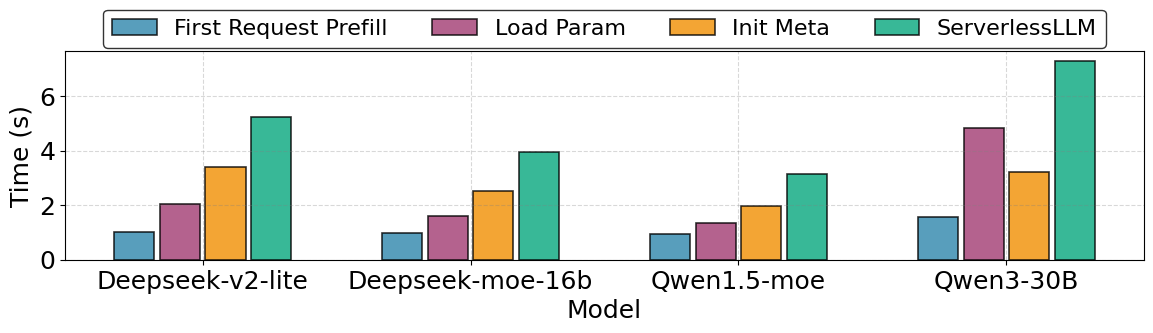

Chart saved: model_performance_bar_chart.pdf


In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Set white style
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'

# Create bar chart for model performance data
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
fontsize = 18

# Prepare data
x = np.arange(len(model_name))
n_metrics = 4
width = 0.15  # Width of each bar
gap = 0.02    # Gap between groups

# Data labels and values
metrics = [
    ('First Request Prefill', sllm_first_prefill_time, '#2E86AB'),
    ('Load Param', sllm_load_param_time, '#A23B72'),
    ('Init Meta', sllm_init_meta_time, '#F18F01'),
    ('ServerlessLLM', sllm_pipe_time, '#06A77D'),
    # ('Decode', sllm_avg_decode_time, '#6C5CE7')
]

# Draw bar charts for all metrics
for idx, (label, values, color) in enumerate(metrics):
    offset = (idx - n_metrics / 2 + 0.5) * (width + gap)
    bars = ax.bar(x + offset, values, width, label=label, 
                  alpha=0.8, color=color, edgecolor='black', linewidth=1.2)

# Set labels and title
ax.set_xlabel('Model', fontsize=fontsize,  color='black')
ax.set_ylabel('Time (s)', fontsize=fontsize,  color='black')
# ax.set_title('Model Performance Comparison (4 GPU 4090)', fontsize=fontsize+2, fontweight='bold', pad=15, color='black')
ax.set_xticks(x)
ax.set_xticklabels(model_name, color='black', fontsize=fontsize, rotation=0)
ax.tick_params(axis='both', which='major', labelsize=fontsize, colors='black')
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8, color='gray')
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Set legend outside the plot
ax.legend(fontsize=fontsize-2, loc='upper center', bbox_to_anchor=(0.5, 1.25), 
          frameon=True, facecolor='white', edgecolor='black', ncol=4)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig('/mnt/zhengcf3/lmp/examples/draw/model_performance_bar_chart.pdf', 
            bbox_inches='tight', facecolor='white')
plt.show()

print("Chart saved: model_performance_bar_chart.pdf")


In [71]:
import numpy as np
experts_num = [4, 8, 16, 32, 64, 128]
bmm_times_32 = [np.float64(0.33364295959472656), np.float64(0.43909549713134766), np.float64(0.666964054107666), np.float64(1.0802030563354492), np.float64(2.0460128784179688), np.float64(3.81777286529541)]
seq_times_32 = [np.float64(0.4798412322998047), np.float64(0.8993983268737793), np.float64(1.7045021057128906), np.float64(3.4193873405456543), np.float64(6.722962856292725), np.float64(13.652265071868896)]

bmm_times_64 = [np.float64(0.3177046775817871), np.float64(0.45572519302368164), np.float64(0.6585955619812012), np.float64(1.1101722717285156), np.float64(1.9743680953979492), np.float64(3.8781166076660156)]
seq_times_64 = [np.float64(0.46083927154541016), np.float64(0.8865594863891602), np.float64(1.7213940620422363), np.float64(3.3530592918395996), np.float64(6.802308559417725), np.float64(13.595223426818848)]

bmm_times_128 = [np.float64(0.3259420394897461), np.float64(0.4377007484436035), np.float64(0.6837964057922363), np.float64(1.1363029479980469), np.float64(2.1680116653442383), np.float64(4.265904426574707)]
seq_times_128 = [np.float64(0.4584789276123047), np.float64(0.9219169616699219), np.float64(1.761627197265625), np.float64(3.5503268241882324), np.float64(6.8546295166015625), np.float64(13.548791408538818)]



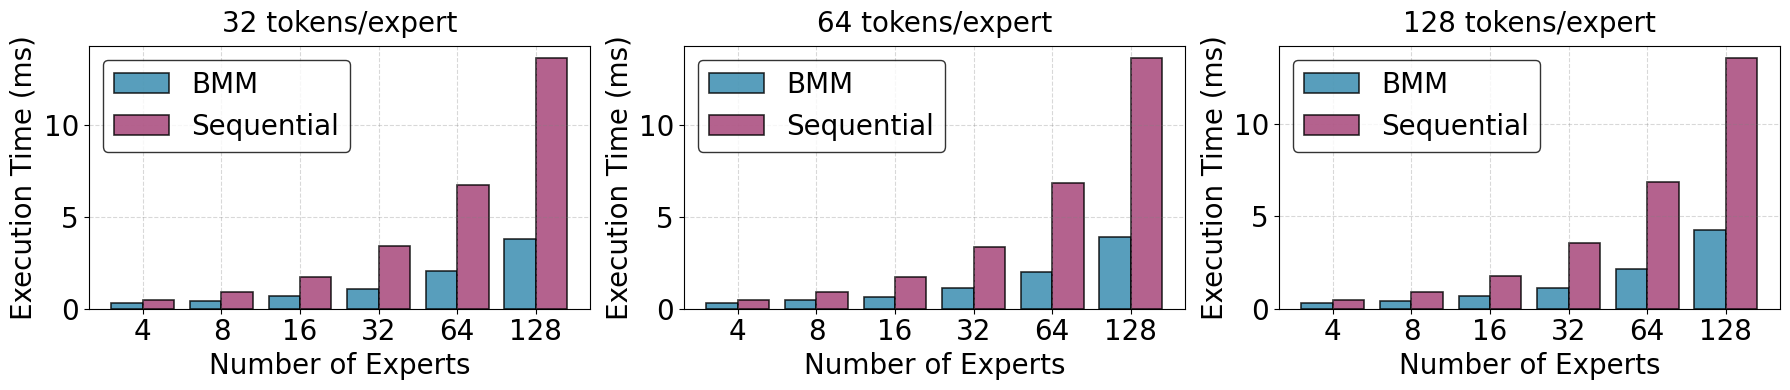

Chart saved: bmm_vs_sequential_bar_chart.pdf


In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Set white style
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'

# Create figure: one subplot for each token configuration
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
fig.patch.set_facecolor('white')
fontsize = 20
# Configure data
token_configs = [
    (32, bmm_times_32, seq_times_32, '32 tokens/expert'),
    (64, bmm_times_64, seq_times_64, '64 tokens/expert'),
    (128, bmm_times_128, seq_times_128, '128 tokens/expert')
]

# Draw bar charts for each configuration
for idx, (tokens, bmm_times, seq_times, title) in enumerate(token_configs):
    ax = axes[idx]
    ax.set_facecolor('white')
    
    x = np.arange(len(experts_num))
    width = 0.4
    
    # Draw bar charts
    bars1 = ax.bar(x - width/2, bmm_times, width, label='BMM', 
                   alpha=0.8, color='#2E86AB', edgecolor='black', linewidth=1.2)
    bars2 = ax.bar(x + width/2, seq_times, width, label='Sequential', 
                   alpha=0.8, color='#A23B72', edgecolor='black', linewidth=1.2)
    
    # Add value labels
    # max_val = max(max(bmm_times), max(seq_times))
    # for i, (bmm_val, seq_val) in enumerate(zip(bmm_times, seq_times)):
    #     ax.text(i - width/2, bmm_val + max_val * 0.02, f'{bmm_val:.2f}', 
    #             ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')
    #     ax.text(i + width/2, seq_val + max_val * 0.02, f'{seq_val:.2f}', 
    #             ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')
    
    # Set labels and title
    ax.set_xlabel('Number of Experts', fontsize=fontsize, color='black')
    ax.set_ylabel('Execution Time (ms)', fontsize=fontsize,  color='black')
    ax.set_title(title, fontsize=fontsize, pad=10, color='black')
    ax.set_xticks(x)
    ax.set_xticklabels(experts_num, color='black', fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize, colors='black')
    ax.legend(fontsize=fontsize, loc='upper left', frameon=True, facecolor='white', edgecolor='black')
    ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8, color='gray')
    # ax.spines['top'].set_color('black')
    # ax.spines['bottom'].set_color('black')
    # ax.spines['left'].set_color('black')
    # ax.spines['right'].set_color('black')

plt.tight_layout()
plt.savefig('/mnt/zhengcf3/lmp/examples/draw/bmm_vs_sequential_bar_chart.pdf', 
            bbox_inches='tight', facecolor='white')
plt.show()

print("Chart saved: bmm_vs_sequential_bar_chart.pdf")

In [73]:
# qwen1.5
a = [ 8.2, 7.63, 7.45]
b = [ 3.2, 2.83, 2.77]
c = [ 7.3, 7.22, 7.26 ]
print(sum(c)/len(c))
# print(sum(a)/len(a))
print((sum(a)-sum(b))/len(a))

7.260000000000001
4.826666666666665
